# <b>New York City Airbnb EDA</b>
----

What is Exploratory Data Analysis (EDA)?<br>

Exploratory data analysis (EDA) is the starting and fundamental approach to any data analysis, as it aims to understand the main characteristics of a data set before performing more advanced analysis or further modeling.

EDA involves the following:

- Data visualization: Using plots such as histograms, box plots, scatter plots and many others to visualize the distribution of the data, the relationships between variables and any anomalies or peculiarities in the data.<br>
- Anomaly identification: Detecting and sometimes dealing with outliers or missing data that could affect further analysis.<br>
- Hypothesis formulation: From the scan, analysts can begin to formulate hypotheses that will then be tested in more detailed analysis or modeling.<br>

The main purpose of EDA is to see what the data can tell us beyond the formal modeling task. It serves to ensure that the subsequent modeling or analysis phase is done properly and that any conclusions are based on a correct understanding of the structure of the data

### Step 1: Problem statement and data collection

### Step 2: Exploration and data cleaning
- #### 2.1 Summarize DF
- #### 2.2 Eliminate duplicates
- #### 2.3 Elimnate irrelevant information

### Step 3: Analysis of univariate variables
- #### 3.1 Analysis of categorical variables
- #### 3.2 Analysis of numerical variables

### Step 4: Analysis of multivariate variables
- #### 4.1 Numerical-numerical analysis
- #### 4.2 Categorical-categorical analysis
- #### 4.3 Other mixed analysis
- #### 4.4 From string to numerical transformation --> <i>JSON saving</i>
- #### 4.5 Correlation matrix

### Step 5: Feature engineering
- #### 5.1 Outliers analysis
- #### 5.2 Upper and lower limits of outliers variables --> <i>JSON saving</i>
- #### 5.3 Copy 2 DataFrames: with and without outliers
- #### 5.4 Missing value analysis
- #### 5.5 Inference of new features
- #### 5.6 Feature Scaling
    - ##### 5.6.1 train test
    - ##### 5.6.2 Normalization
    - ##### 5.6.3 Min-Max Scaling

### Step 6: Feature selection
---

Imported Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump


## Step 1: Problem statement and data collection

**Analysis Objective**
1. Analyze the most relevant variables influencing price.
2. Identify occupancy patterns and trends.
3. Detect anomalies and outliers

**Context of the Analysis**

- From the Host’s Perspective:

  - Understand the price range in their neighborhood to set competitive prices
  - Gain insight into how certain factors, such as reviews or amenities, impact occupancy and pricing.

- From the User or Guest’s Perspective:

  - Gather information about the most common types of properties and popular neighborhoods.
  - Identify which factors affect price to make informed accommodation choices.

- From Airbnb’s (Company) Perspective:

  - Improve the recommended pricing strategy based on neighborhood, seasonality, and demand
  - Identify areas with high demand or low supply to attract more hosts
  - Conduct a market segmentation analysis to refine marketing strategies.

In [2]:
# Import the dataset to start working with it

AB_NYC_2019 = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

AB_NYC_2019.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


<b>Description and types of Data</b>
- `id` --> Rental identificator number <i>(Numerical)</i>

- `name` --> Name of the property <i>(Categorical)</i>

- `host_id` --> Host´s identificator <i>(Numerical)</i>
- `host_name` --> Host´s name <i>(Categorical)</i>
- `neighbourhood_group` --> Boroughs <i>(Categorical)</i>
- `neighbourhood` --> neighbourhood <i>(Categorical)</i>
- `latitude` --> Property latitude <i>(Numerical)</i>
- `longitude` --> Property longitude <i>(Numerical)</i>
- `room_type` --> Type of the room <i>(Categorical)</i>
- `price` --> Price per one night <i>(Numerical)</i>
- `minimum_nights` --> Minimum amount of nights to book the place <i>(Numerical)</i> 
- `number_of_reviews` --> Number of reviews received <i>(Numerical)</i>
- `last_review` --> Date of the last review <i>(Categorical)</i>
- `reviews_per_month` --> Amount of reviews per month <i>(Numerical)</i>
- `calculated_host_listing_count` --> Number of rentals by host <i>(Numerical)</i>
- `availability_365` --> Number of days of availability within 365 days <i>(Numerical)</i>

---


## Step 2: Exploration and data cleaning

- ### 2.1 Summarize DF

In [3]:
# Obtain dimensions

rows, columns = AB_NYC_2019.shape

print(f"The dimensions of this dataset are: {rows} Rows and {columns} Columns")

The dimensions of this dataset are: 48895 Rows and 16 Columns


In [4]:
# Obtain information about data types and non-null values

AB_NYC_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Check null values

null_var = AB_NYC_2019.isnull().sum().loc[lambda x: x > 0]

num_of_null_var = len(null_var)

print(f"{null_var}\n\nThe number of null variables are {num_of_null_var}")

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

The number of null variables are 4


----------<b>Conclusions</b>----------

- There are a total of 48895 rows (in this case rentals) and 16 columns, among which we find the target or class to predict, `price`.

- The variables `las_review` and `reviews_per_month` have 38843 instances with values, so it would contain more than 10_000 null values. The variables `name` and `host_name` also have null values, but in a much smaller number than the previous one. The rest of the variables always have a value.
- The data has 10 numerical characteristics and 6 categorical characteristics.

---

- ### 2.2 Eliminate duplicates

In [6]:
# Obtain the number of duplicate values in our dataset

print(f"The number of duplicate values in the dataset is {AB_NYC_2019.duplicated().sum()}")

The number of duplicate values in the dataset is 0


----------**Additions**----------

    In this case, we did not find any duplicate values. In the case that we had found it, the next step would be to apply the `drop_duplicates()` function.

In [7]:
'''
AB_NYC_2019= AB_NYC_2019.drop_duplicates(subset = AB_NYC_2019.columns.difference(['variable_wrongly_generated']))
print(AB_NYC_2019.shape)
AB_NYC_2019.head()
'''

# OR

'''
if AB_NYC_2019.duplicated().sum():
    AB_NYC_2019 = AB_NYC_2019.drop_duplicates()
print(AB_NYC_2019.shape)
AB_NYC_2019.head()
'''

'\nif AB_NYC_2019.duplicated().sum():\n    AB_NYC_2019 = AB_NYC_2019.drop_duplicates()\nprint(AB_NYC_2019.shape)\nAB_NYC_2019.head()\n'

- ### 2.3 Eliminate irrelevant information

    Since our goal is to predict the price variable, we should select only the variables that have a meaningful relationship with it and can add value to the predictive process. The variables `name`, `id`, `host_name`, `last_review` and `host_id` are not useful for the model, likely because they are text-based, identifiers, or contain information that does not directly contribute to price prediction.

In [8]:
# For the float dtypes we are going to fill the missing values by mean().

AB_NYC_2019['reviews_per_month'] = AB_NYC_2019['reviews_per_month'].fillna(AB_NYC_2019['reviews_per_month'].mean())

In [9]:
# Eliminate irrelevant columns

AB_NYC_2019.drop(["name", "id", "host_name", "last_review", "host_id"],
                    axis = "columns",
                        inplace = True)

AB_NYC_2019.head(3)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365


---
## Step 3: Analysis of univariate variables

A **univariate variable** is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

- ### 3.1 Analysis of categorical variables
    A **categorical variable** is a type of variable that can be one of a limited number of categories or groups. These groups are often nominal (e.g., the color of a car: red, blue, black, etc., but none of these colors is inherently "greater" or "better" than the others) but can also be represented by finite numbers.

    To represent these types of variables we will use histograms. Before we start plotting, we must identify which ones are categorical, and this can be easily checked by analyzing the range of values. In this case, the categorical variables are: 
    - ###### `neighbourhood_group`
    - ###### `neighbourhood`
    - ###### `room_type`


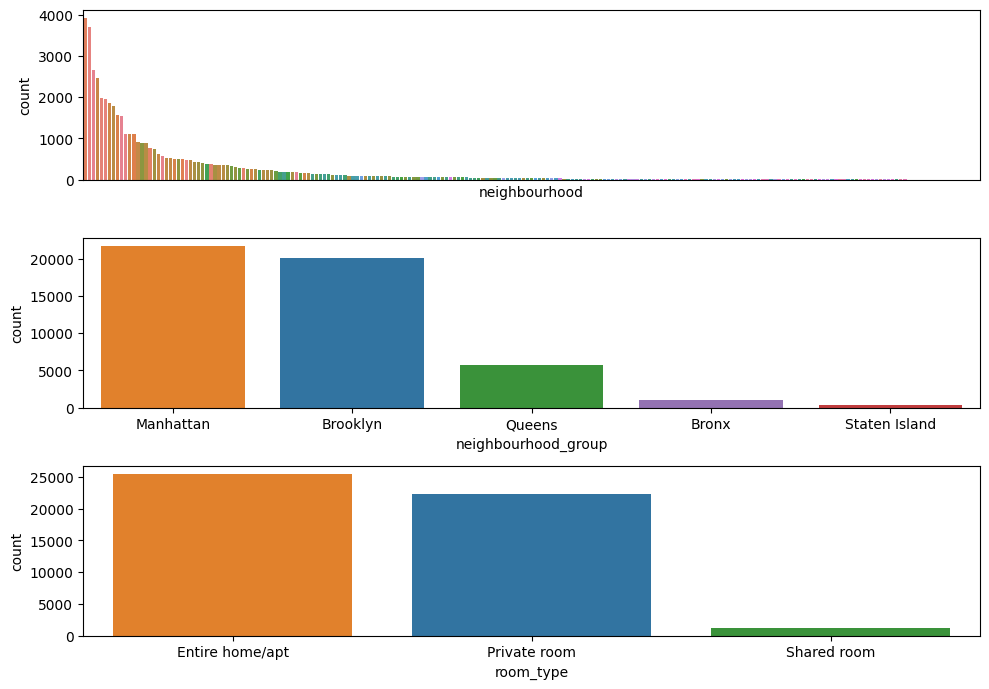

In [10]:
# Why I use countplot instead of histogram for categorical variables?
# Countplot is used to show the count of observations for each category in a categorical variable.
# Histplot is used to display the distribution of a numerical variable by dividing it into 
# intervals, or "bins," and showing the frequency of observations in each bin.


# Frecuency of each category and histogram

fig, axis = plt.subplots(3, 1, figsize = (10, 7))


# Create Histogram (Countplots)

sns.countplot(ax = axis[0],
                data = AB_NYC_2019,
                    x = "neighbourhood",
                        hue = "neighbourhood",
                            order=AB_NYC_2019['neighbourhood'].sort_values().value_counts().index).set_xticks([])

sns.countplot(ax = axis[1],
                data = AB_NYC_2019,
                    x = "neighbourhood_group",
                        hue = "neighbourhood_group",
                            order=AB_NYC_2019['neighbourhood_group'].sort_values().value_counts().index)

sns.countplot(ax = axis[2],
                data = AB_NYC_2019, 
                    x = "room_type",
                        hue = "room_type",
                            order=AB_NYC_2019['room_type'].sort_values().value_counts().index)


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Conclusions**----------
- `neighbourhood_group`: Manhattan and Brooklyn are markedly the best boroughs in New York City.

- `room_type`: Almost all people prefer entire home/apt and private room rather than shared room.

- `neighbourhood`: **Continue below for overview**

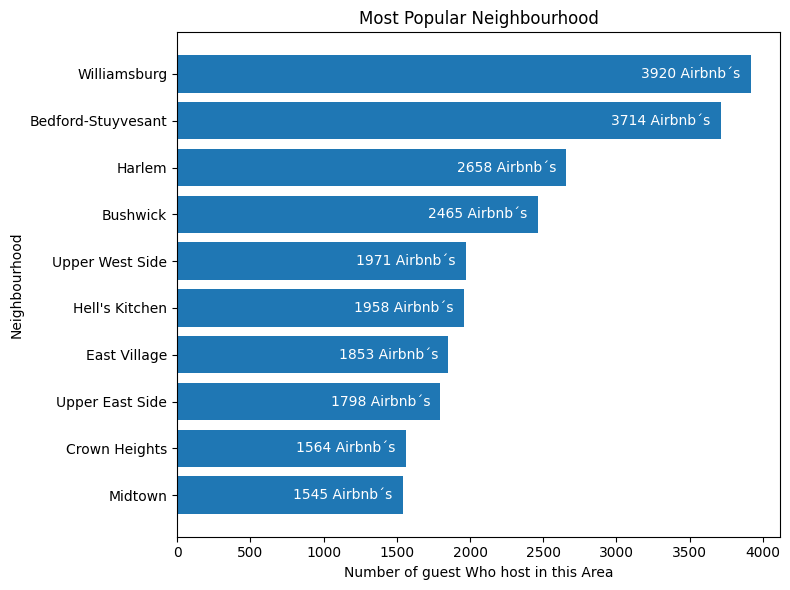

In [11]:
# Get the top 10 neighborhoods by listing count
data = AB_NYC_2019.neighbourhood.value_counts()[:10]

# Figure size
plt.figure(figsize=(8, 6))

x = list(data.index) # Neighbourhoods Names
y = list(data.values) # Neighbourhoods Counts 

# Reverse them for descending order
x.reverse()
y.reverse()

# Title and Labels
plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood")
plt.xlabel("Number of guest Who host in this Area")

# Horizontal bar chart
plt.barh(x, y)

# Add values in each bar
for index, values in enumerate(y):
    
    plt.text(values - 750, index,
              f'{values} Airbnb´s',
                    color='white',
                        va='center')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In the chart above, we can see an overview of the 10 most popular neighbourhoods.

---

- ### 3.2 Analysis of numerical variables

    A **numeric variable** is a type of variable that can take numeric values (integers, fractions, decimals, negatives, etc.) in an infinite range. A numerical categorical variable can also be a numerical variable (e.g. for further analysis, we can take the class `room_type` as numerical also to study relationships). They are usually represented using a **histogram and a boxplot**, displayed together. Before starting to plot, we must also identify which are the numerical ones, which are:
    - ###### `price`                
    - ###### `minimum_nights`       
    - ###### `number_of_reviews`
    - ###### `calculated_host_listings_count`
    - ###### `availability_365`

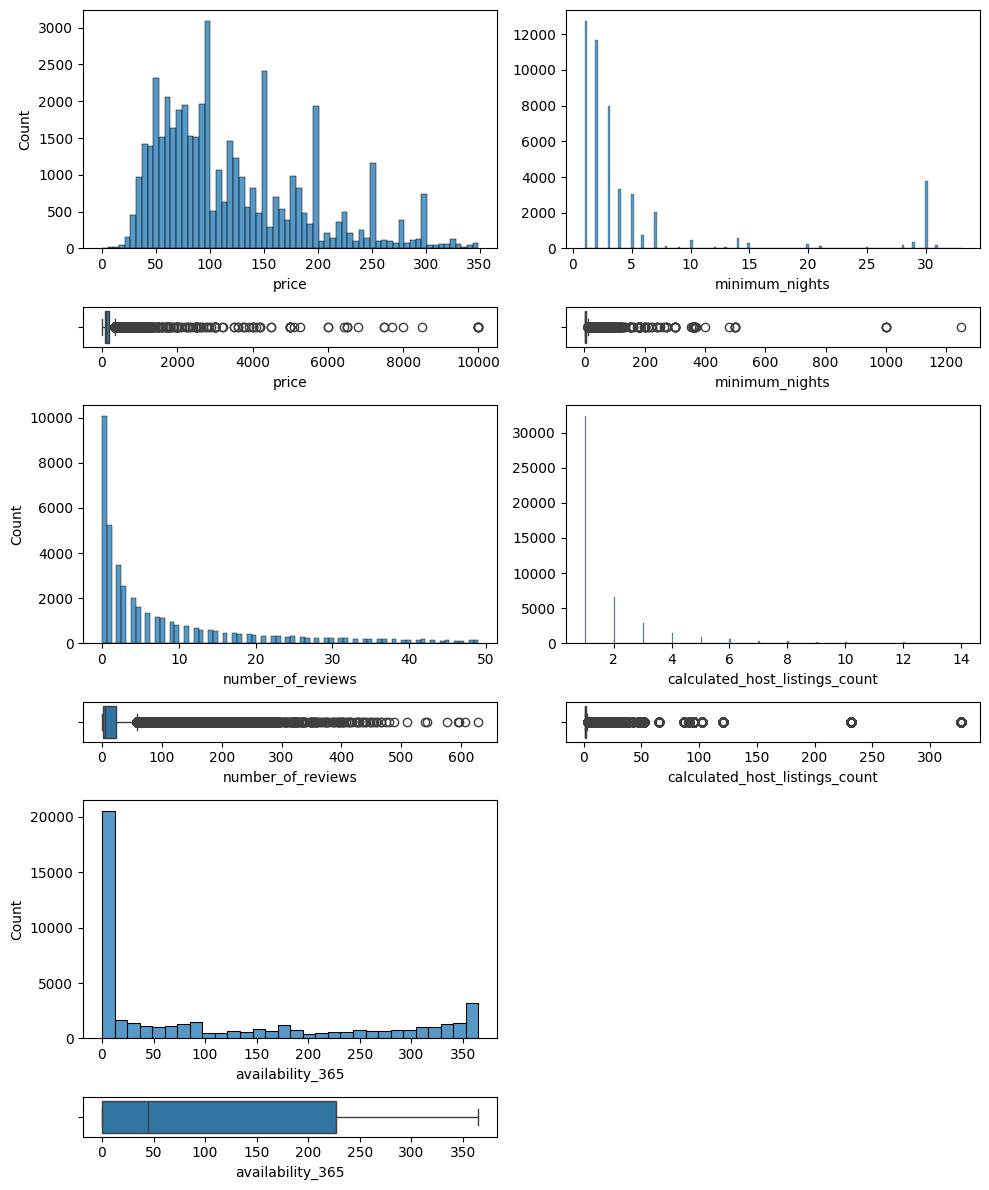

In [12]:
fig, axis = plt.subplots(6, 2,
                            figsize = (10, 12),
                                gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})


# ==========================Variable price================================  
sns.histplot(ax = axis[0, 0],
                data = AB_NYC_2019[AB_NYC_2019['price']<350], # take values < 350 because the rest of the values are scattered
                    x = "price")

sns.boxplot(ax = axis[1, 0],
                data = AB_NYC_2019,
                    x = "price")


# ==========================Variable minimum_nights=======================
sns.histplot(ax = axis[0, 1],
                data = AB_NYC_2019[AB_NYC_2019['minimum_nights'] < 35], # take values < 35 because the rest of the values are scattered
                    x = "minimum_nights").set(ylabel = None)

sns.boxplot(ax = axis[1, 1],
                data = AB_NYC_2019,
                     x = "minimum_nights")


# ==========================Variable number_of_reviews====================
sns.histplot(ax = axis[2, 0],
                data = AB_NYC_2019[AB_NYC_2019['number_of_reviews'] < 50], # take values < 50 because the rest of the values are scattered
                     x = "number_of_reviews")

sns.boxplot(ax = axis[3, 0],
                data = AB_NYC_2019, 
                     x = "number_of_reviews")


# ==========================Variable calculated_host_listings_count======
sns.histplot(ax = axis[2, 1],
                data = AB_NYC_2019[AB_NYC_2019['calculated_host_listings_count'] < 15], # take values < 15 because the rest of the values are scattered
                    x = "calculated_host_listings_count").set(ylabel = None)

sns.boxplot(ax = axis[3, 1],
                data = AB_NYC_2019,
                    x = "calculated_host_listings_count")


# ==========================Variable availability_365====================
sns.histplot(ax = axis[4, 0],
                data = AB_NYC_2019,
                    x = "availability_365")

sns.boxplot(ax = axis[5, 0],
                data = AB_NYC_2019,
                    x = "availability_365")


# Remove the empty axes
fig.delaxes(ax = axis[4,1])
fig.delaxes(ax = axis[5,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Breakdown**----------

Price:

- Most properties are priced between 0 and 200 currency units, with a peak around 100.
- There are few high price values, shown as outliers in the boxplot, extending up to 10,000.
- The distribution is right-skewed, indicating that while most prices are low to moderate, there are some luxury listings with high prices.

Minimum Nights (minimum_nights):

- Most properties have a low minimum stay requirement, between 1 and 5 nights.
- Some extremely high values indicate properties with long minimum stay requirements, reaching up to 1,200 nights (likely an error or a very specific offering).
- This pattern suggests that most properties are geared towards short stays, while a few are designed for extended stays.

Number of Reviews (number_of_reviews):

- Most properties have fewer than 10 reviews, with a sharp decrease in the number of properties as the review count increases.
- This suggests that many properties are new or have low activity, while a few have many reviews, indicating popularity and high activity.
- There are also some outliers with over 600 reviews, likely highly popular properties.

Host Listings Count (calculated_host_listings_count):

- Most hosts have only one property listed, and very few have more than 5 properties.
- There are outliers with up to 300 properties, likely large operators or companies managing multiple listings.
- This pattern indicates that the platform is mainly composed of individual hosts with few listings, but with some larger operators.

Availability Days per Year (availability_365):

- Many properties have very low or very high availability (especially around 0 and 365 days).
- This pattern suggests that some properties are always available, while others have limited or no availability (possibly due to frequent bookings or personal use).
- The bimodal distribution could indicate the presence of mixed-use properties (rentals and personal use).

----------**General Conclusions**----------
- Most properties are in the low to mid-price range and are managed by individual hosts.

- There are a few extreme values across all variables, representing properties or hosts with unusual characteristics (high prices, long minimum stays, full or limited availability).

- The platform seems to cater primarily to short-term stays (low minimum nights) with some accommodations for long-term stays.

---

## Step 4: Analysis of multivariate variables
- ### 4.1 Numerical-numerical analysis
    When the two variables being compared have numerical data, the analysis is said to be numerical-numerical. Scatterplots and correlation analysis are used to compare two numerical columns.

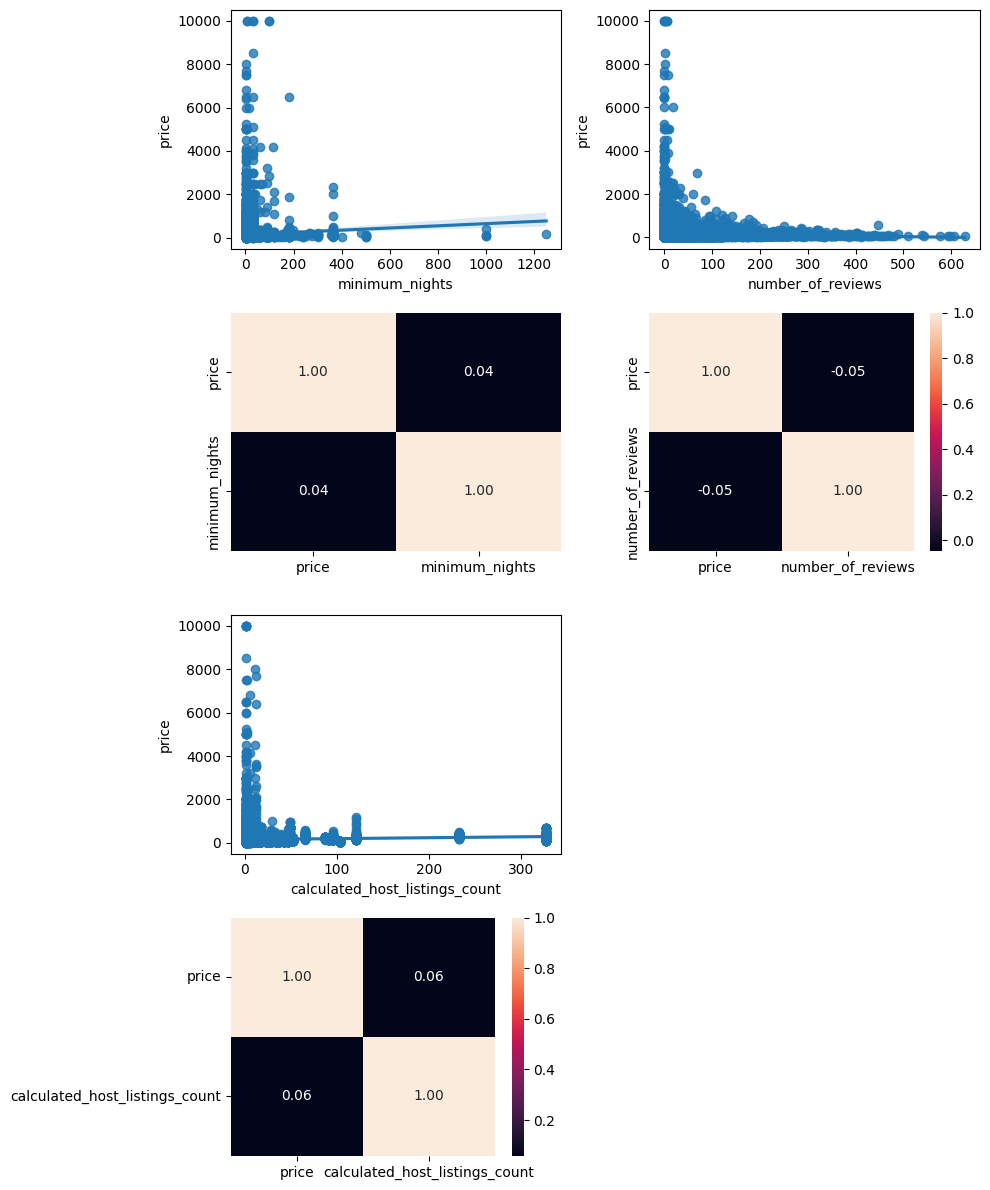

In [13]:
fig, axis = plt.subplots(4, 2, figsize = (10, 12))


# Analysis of variable 'minimum_nights' respect 'price'
sns.regplot(ax = axis[0,0],
                data = AB_NYC_2019,
                    x = "minimum_nights", 
                         y = "price")

sns.heatmap(AB_NYC_2019[["price", "minimum_nights"]].corr(),
                annot = True, 
                    fmt = ".2f", 
                        ax = axis[1, 0], 
                            cbar = False)


# Analysis of variable 'number_of_reviews' respect 'price'
sns.regplot(ax = axis[0,1],
                data = AB_NYC_2019,
                    x = "number_of_reviews", 
                         y = "price")

sns.heatmap(AB_NYC_2019[["price", "number_of_reviews"]].corr(), 
                annot = True, 
                    fmt = ".2f",
                        ax = axis[1, 1])


# Analysis of variable 'calculated_host_listings_count' respect 'price'
sns.regplot(ax = axis[2,0],
                data = AB_NYC_2019, 
                    x = "calculated_host_listings_count", 
                        y = "price")

sns.heatmap(AB_NYC_2019[["price", "calculated_host_listings_count"]].corr(),
                annot = True, 
                    fmt = ".2f", 
                        ax = axis[3,0])


# Remove the empty axes
fig.delaxes(ax = axis[2,1])
fig.delaxes(ax = axis[3,1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

----------**Conclusions**----------


- The weak correlations suggest that `price` is largely independent of `minimum_nights`, `number_of_reviews`, and `calculated_host_listings_count`.

- While the scatter plots show some clustering patterns, the overall lack of strong correlations indicates that other factors (such as location, property type, or amenities) are likely more important in determining property prices.


---

- ### 4.2 Categorical-categorical analysis

    When the two variables being compared have categorical data, the analysis is said to be categorical-categorical. Histograms and combinations are used to compare two categorical columns.

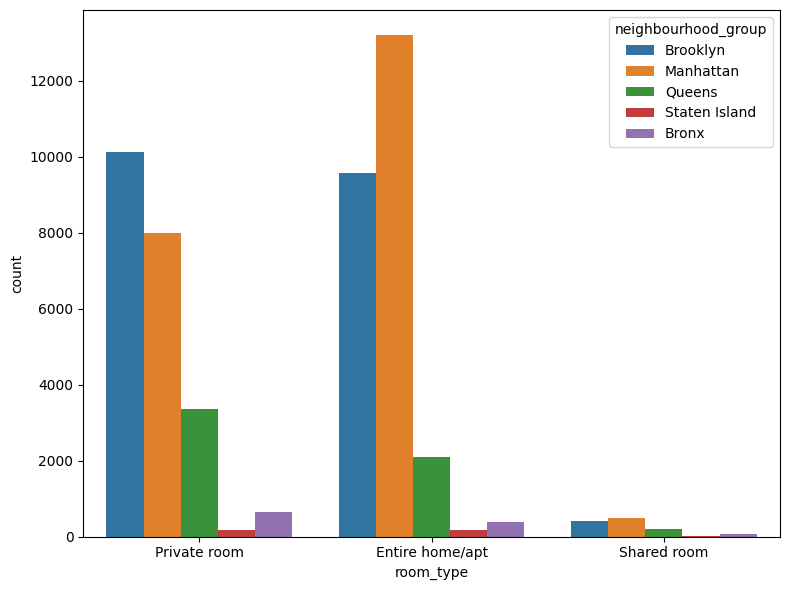

In [14]:
plt.figure(figsize=(8,6))

sns.countplot( data = AB_NYC_2019,
                x = "room_type",
                    hue = "neighbourhood_group")

plt.tight_layout()
plt.show()

----------**Conclusions**----------

- `Manhattan and Brooklyn` are the most active neighborhoods in terms of listings, with both neighborhoods dominating in private rooms and entire home/apartment categories.

- `Queens, Bronx, and Staten Island` have fewer listings across all categories, indicating less competition and potentially lower demand in these areas.

- `Shared rooms` are the least popular room type across all neighborhoods, highlighting a general preference among guests for more private accommodations.

---

- ### 4.3 Other mixed analysis

- ### 4.4 From string to numerical transformation --> <i>JSON saving</i>

    - `Note`: To compare numerical data with categorical data, we need to convert the categorical data into binary format using 'One Hot Encoding'.



In [15]:
def encoding(dataset, variable, json_path):

    factorize = pd.factorize(dataset[variable])

    parsing_dict = {}

    indexes = factorize[1]

    set_factor = list(set(factorize[0]))

    for index in range(len(factorize[1])):
        parsing_dict.update({indexes[index]: int(set_factor[index])})

    with open(json_path, "w") as f:
        json.dump(parsing_dict, f)

In [16]:
# Encoding Variable 'room_type'
encoding(AB_NYC_2019, "room_type", "../data/interim/transform_room_type.json")

# Encoding Variable 'neighbourhood_group'
encoding(AB_NYC_2019, "neighbourhood_group", "../data/interim/transform_neighbourhood_group.json")

# Encoding Variable 'neighbourhood'
encoding(AB_NYC_2019, "neighbourhood", "../data/interim/transform_neighbourhood.json")


---

In [17]:
def open_encoded_var(dataset, variable, json_path):

    with open(json_path, "r") as f:
        job_dict = json.load(f)

    dataset[variable] = dataset[variable].apply(lambda x: job_dict.get(x))

In [18]:
# Open Variable 'room_type_dict'
open_encoded_var(AB_NYC_2019, "room_type", "../data/interim/transform_room_type.json")

# Open Variable 'neighbourhood_group_dict'
open_encoded_var(AB_NYC_2019, "neighbourhood_group", "../data/interim/transform_neighbourhood_group.json")

# Open Variable 'neighbourhood_dict'
open_encoded_var(AB_NYC_2019, "neighbourhood", "../data/interim/transform_neighbourhood.json")


- #### 4.5 Correlation matrix (Numerical-Categorical analysis)

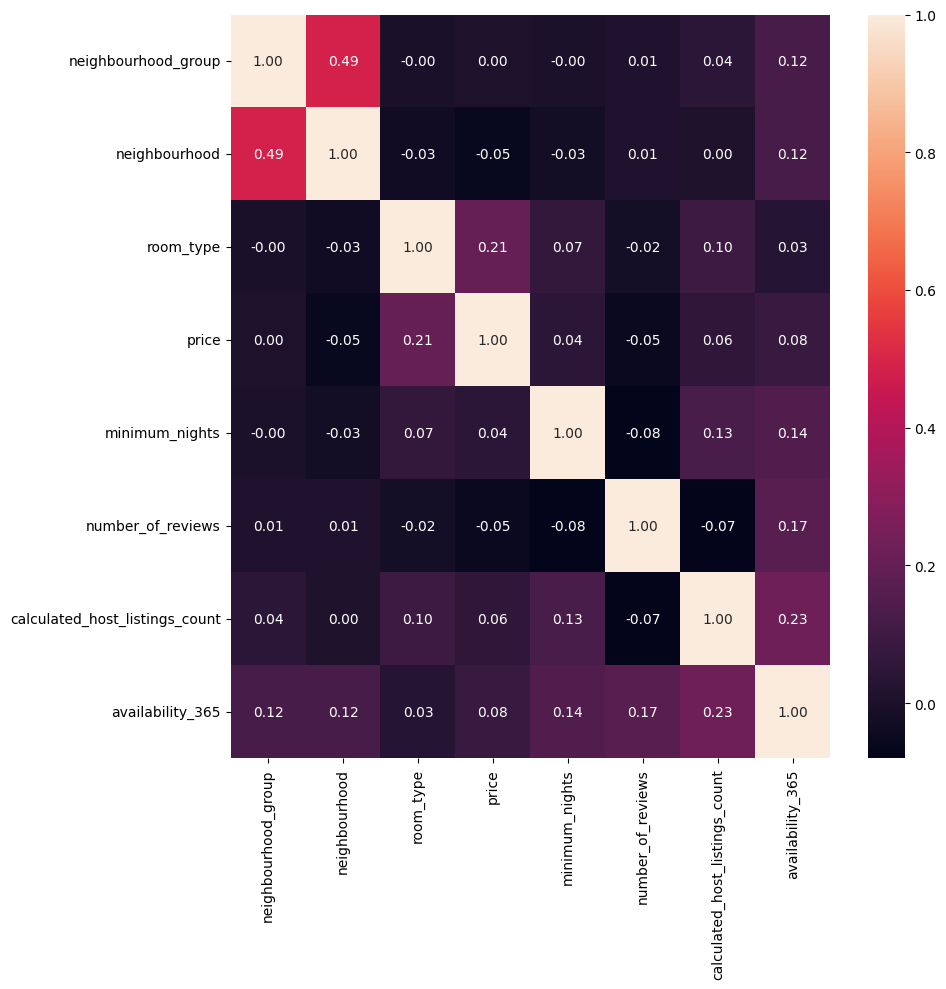

In [19]:
fig, axes = plt.subplots(figsize=(10, 10))


sns.heatmap(AB_NYC_2019[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(),
                            annot = True,
                                 fmt = ".2f")


plt.tight_layout()


plt.show()

----------**Conclusions**----------

Higher correlations:

- There is a moderate correlation between `neighbourhood_group and neighbourhood` (0.49), which makes sense since neighborhoods are grouped into larger neighborhood groups.

- `room_type and price` also show a moderate positive correlation (0.21), indicating that room type may be related to price.

- `calculated_host_listings_count and availability_365` have a moderate correlation (0.23), suggesting that the number of listings a host has may influence availability.

Low correlations:

- Most other relationships between variables have a correlation close to 0, suggesting that there is no strong linear relationship between them. For instance, price has a low correlation with `number_of_reviews` (-0.05) and `minimum_nights` (0.04), indicating that price does not directly depend on these variables.

Notable negative correlation:

- There is a slight negative correlation between `number_of_reviews and minimum_nights`(-0.08), which could indicate that properties with lower minimum night requirements tend to receive more reviews, possibly because guests prefer shorter stays.

---

Once the correlation has been calculated, we can draw the `pairplot` (this is an optional step):

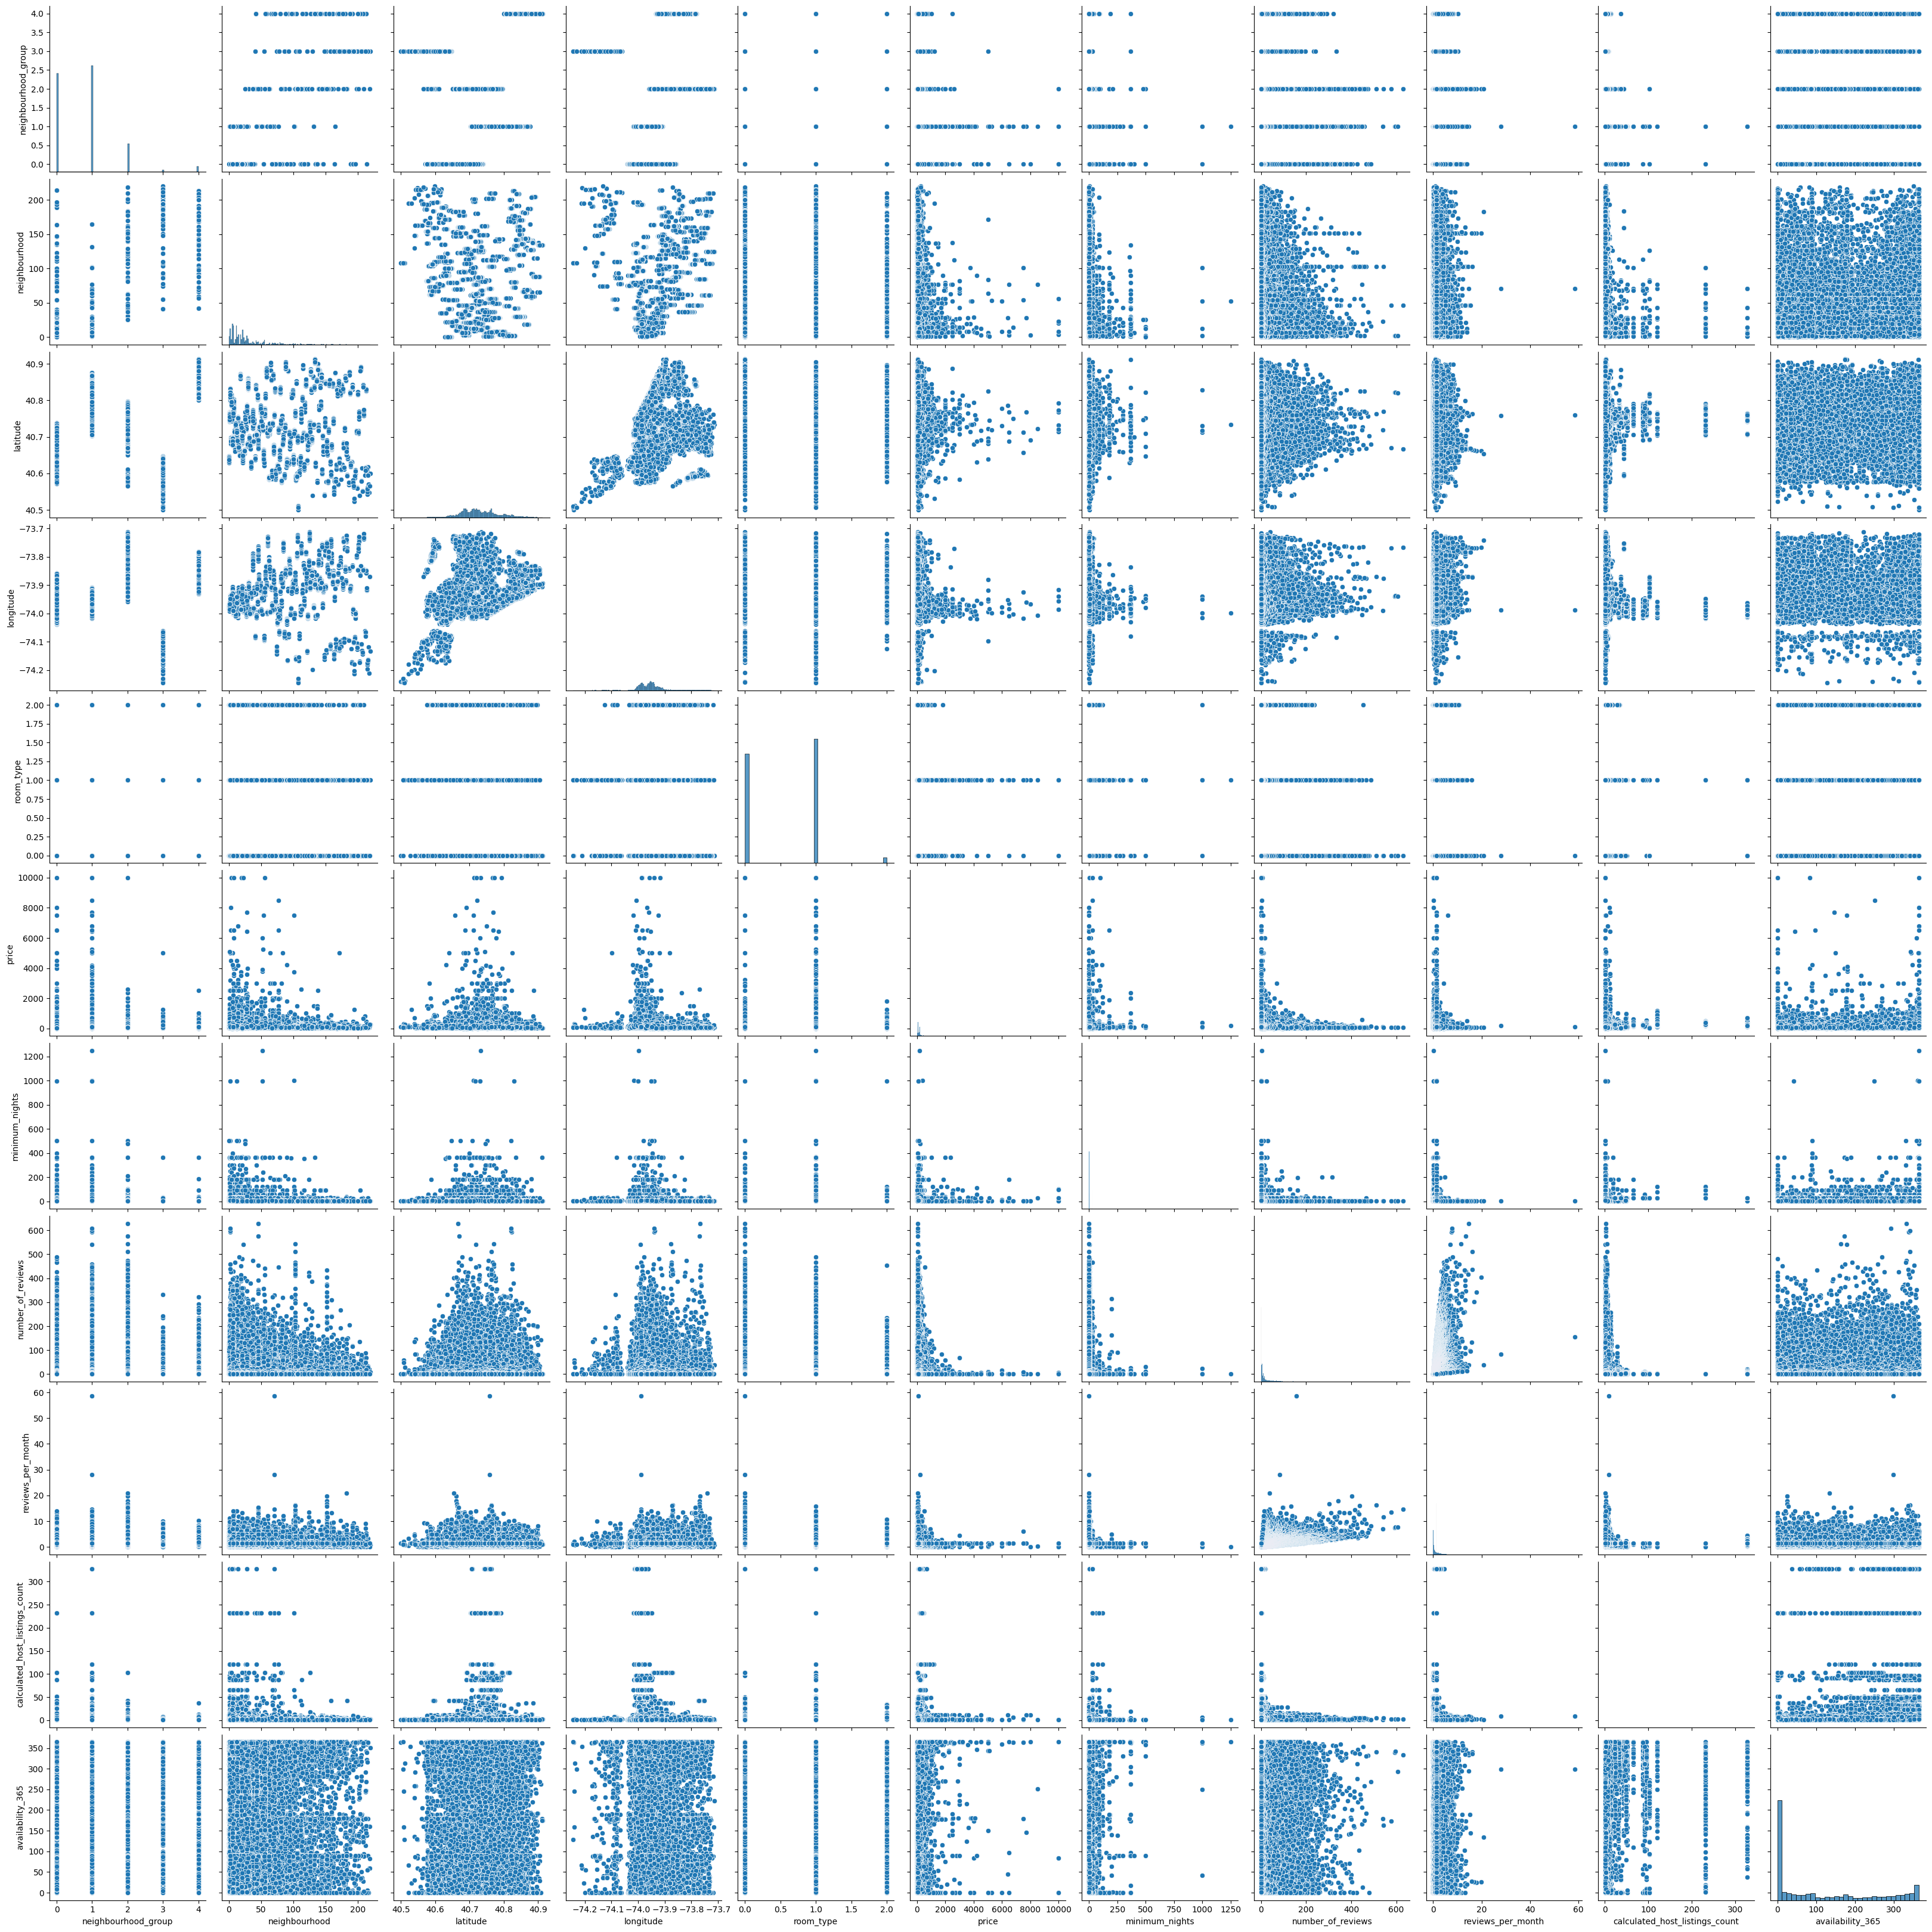

In [20]:

sns.pairplot(AB_NYC_2019, height=3, diag_kind='hist')

---

## Step 5: Feature engineering

**Feature engineering** is a process that involves the creation of new features (or variables) from existing ones to improve model performance. This may involve a variety of techniques, such as normalization, data transformation, and so on. The goal is to improve the accuracy of the model and/or reduce the complexity of the model, thus making it easier to interpret.

- ### 5.1 Outliers analysis

    An **outlier** is a data point that deviates significantly from the others. It is a value that is noticeably different from what would be expected given the general trend of the data. These outliers may be caused by errors in data collection, natural variations in the data, or they may be indicative of something significant, such as an anomaly or extraordinary event.

    **Descriptive analysis** is a powerful tool for characterizing the data set: the mean, variance and quartiles provide powerful information about each variable. The `describe()` function of a DataFrame helps us to calculate in a very short time all these values.

In [21]:
# ==============IMPORTANT===============

total_stats = AB_NYC_2019.describe()

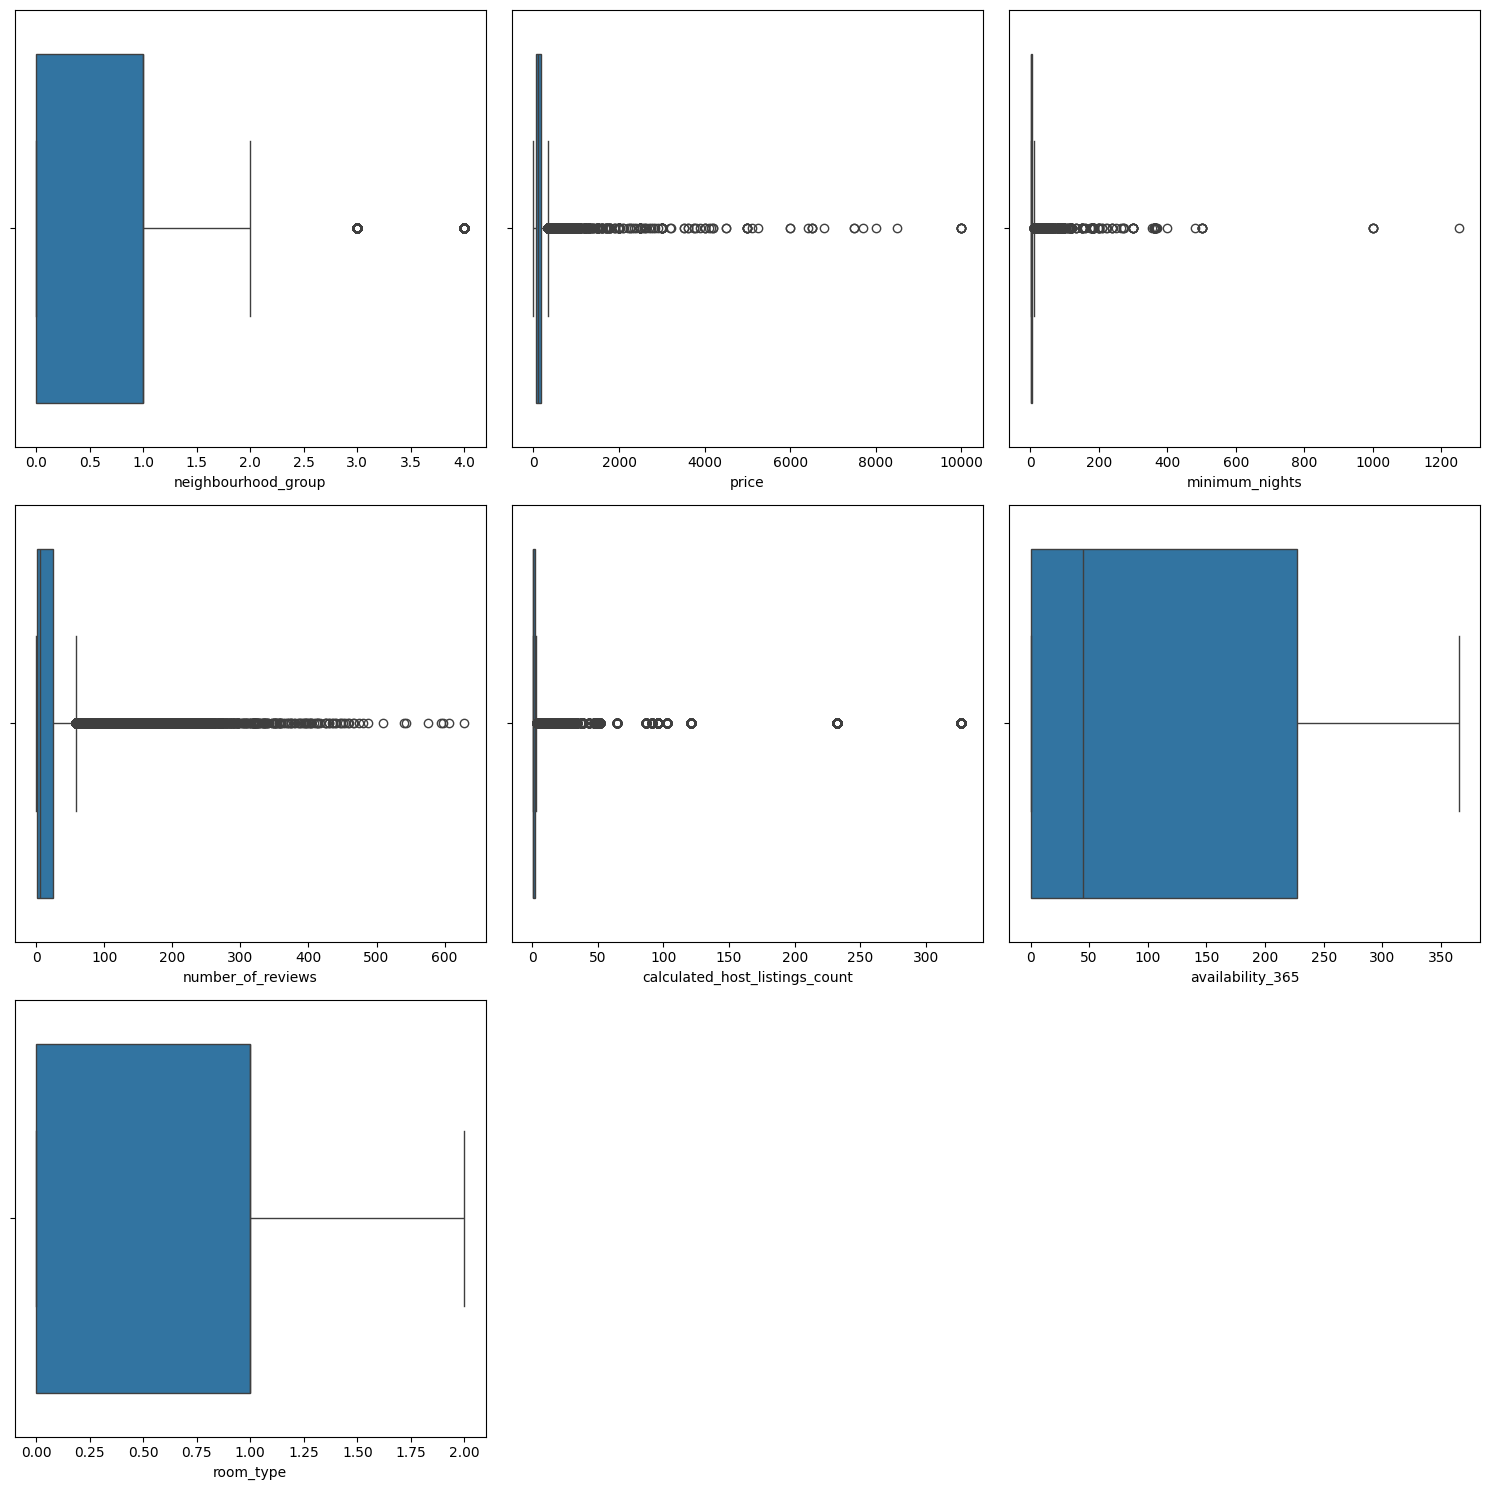

In [22]:
'''Las variables neighbourhood latitude longitude y reviews per month no las reprepsentamos porque
no se consideran necesarias ya que tenemos neighbourhood_group y number of reviews'''

fig, axes = plt.subplots(3, 3, figsize = (15, 15))


sns.boxplot(ax = axes[0, 0],
                data = AB_NYC_2019,
                    x = "neighbourhood_group")

sns.boxplot(ax = axes[0, 1],
                data = AB_NYC_2019,
                    x = "price")

sns.boxplot(ax = axes[0, 2],
                data = AB_NYC_2019,
                    x = "minimum_nights")
  
sns.boxplot(ax = axes[1, 0],
                data = AB_NYC_2019,
                    x = "number_of_reviews")

sns.boxplot(ax = axes[1, 1],
                data = AB_NYC_2019, 
                    x = "calculated_host_listings_count")

sns.boxplot(ax = axes[1, 2],
                data = AB_NYC_2019, 
                    x = "availability_365")

sns.boxplot(ax = axes[2, 0],
                data = AB_NYC_2019,
                     x = "room_type")

# Remove the empty axes
fig.delaxes(ax = axes[2,1])
fig.delaxes(ax = axes[2,2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- ### 5.2 Upper and lower limits of outliers variables --> <i>JSON saving</i>

In [23]:
def def_outliers(total_stats, variable, json_file):

    individual_stats = total_stats[variable] # Save the stats for IQR

    iqr = individual_stats["75%"] - individual_stats["25%"]
    upper_limit = individual_stats["75%"] + (2 * iqr) 
    lower_limit = individual_stats["25%"] - (2 * iqr)

    if (lower_limit < 0): lower_limit = 0

    print(f"\nThe upper_limit of Variable {variable} is {round(upper_limit, 3)}, the lower_limit is {round(lower_limit, 3)} and the IQR is {round(iqr, 3)}")
    print('                      ==========================================                  ')
    with open(json_file, "w") as f:
        json.dump({
            "upper_limit": upper_limit,
            "lower_limit": lower_limit
        }, f)

In [24]:
# ==========Variable 'price'===========
def_outliers(total_stats, "price", "../data/interim/outliers_price.json")

# ==========Variable 'minimum_nights'===========
def_outliers(total_stats, "minimum_nights", "../data/interim/outliers_minimum_nights.json")

# ==========Variable 'number_of_reviews'===========
def_outliers(total_stats, "number_of_reviews", "../data/interim/outliers_number_of_reviews.json")

# ==========Variable 'calculated_host_listings_count'===========
def_outliers(total_stats, "calculated_host_listings_count", "../data/interim/outliers_calculated_host_listings_count.json")


The upper_limit of Variable price is 387.0, the lower_limit is 0 and the IQR is 106.0

The upper_limit of Variable minimum_nights is 13.0, the lower_limit is 0 and the IQR is 4.0

The upper_limit of Variable number_of_reviews is 70.0, the lower_limit is 0 and the IQR is 23.0

The upper_limit of Variable calculated_host_listings_count is 4.0, the lower_limit is 0 and the IQR is 1.0


- ### 5.3 Copy 2 DataFrames: with and without outliers

In [25]:
df_con_outliers = AB_NYC_2019.copy()
df_sin_outliers = AB_NYC_2019.copy()

'''Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'''

'Todos los Outliers modificados los guardaremos actualizaremos en df_sin_outliers'

If we had lower_limit = 0 ==> there are not outliers below.

We only have outliers above, upper_limit.

`Open Outliers JSON`

In [26]:
def open_outliers(dataset_without_outliers, variable, json_path):

    with open(json_path, "r") as f:
        outliers = json.load(f)

    upper_limit_ = outliers["upper_limit"]

    lower_limit_ = outliers["lower_limit"]

    dataset_without_outliers[variable] = dataset_without_outliers[variable].apply(
        lambda x: upper_limit_ if (x > upper_limit_) else (lower_limit_ if (x < lower_limit_) else x)
        )

In [27]:
# Open Outliers_price and replace the values 
open_outliers(df_sin_outliers, 'price', "../data/interim/outliers_price.json")

# Open Outliers_minimum_nights and replace the values 
open_outliers(df_sin_outliers, 'minimum_nights', "../data/interim/outliers_minimum_nights.json")

# Open Outliers_number_of_reviews and replace the values 
open_outliers(df_sin_outliers, 'number_of_reviews', "../data/interim/outliers_number_of_reviews.json")

# Open Outliers_calculated_host_listings_count and replace the values 
open_outliers(df_sin_outliers, 'calculated_host_listings_count', "../data/interim/outliers_calculated_host_listings_count.json")


- ### 5.4 Missing value analysis

In [28]:
AB_NYC_2019.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

- ### 5.5 Inference of new features

=== falta revisar===

df_enc['total_reviews']  = df_enc['number_of_reviews'] + df_enc['reviews_per_month']

 Reviewing the changes 
 i_features = ['price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_encoded', 
               'neighbourhood_encoded', 'room_type_encoded', 'coordinates', 'total_reviews']
 sns.heatmap(df_enc[i_features].corr().round(2), annot=True, mask=np.triu(df_enc[i_features].corr()))

df_enc.drop(columns=['number_of_reviews', 'reviews_per_month'], inplace=True)

Aggregation of Review Metrics: A new feature, total_reviews, was created by summing number_of_reviews and reviews_per_month. This approach combines both review-related variables into a single metric, which could help simplify the model

- ### 5.6 Feature Scaling

**Feature scaling** is a crucial step in data preprocessing for many Machine Learning algorithms. It is a technique that changes the range of data values so that they can be compared to each other. Scaling usually involves normalization, which is the process of changing the values so that they have a mean of 0 and a standard deviation of 1. Another common technique is min-max scaling, which transforms the data so that all values are between 0 and 1.


- #### 5.6.1 train test

Before scaling the values, we must conveniently divide the set into train and test, which will prevent the training data from being contaminated by the test set data. The *scaler* will be in charge of scaling the variables according to the training set.
    

In [29]:
def train_test(target_var, df, test_size=0.2, random_state=42):
    
    X = df.drop(columns = target_var)
    y = df[target_var]

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                         test_size = test_size,
                                                           random_state = random_state)
    
    return X_train, X_test, y_train, y_test

Now, we split our data into train and test sets using the function split created earlier. This will be for all necessary data frames created earlier (original, normalized, and min-max scaled for both, with outliers and without outliers)

In [30]:
# Split original dataframe 

# With Outliers
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_test('price', df_con_outliers)

# Without Outliers
X_train_without_outliers, X_test_without_outliers, _, _ = train_test('price', df_sin_outliers)

> NOTE: Only predictor variables should be scaled, never the target.

---

- #### 5.6.2 Normalization
    

In [31]:
def norm(X_train,
          X_test,
            type_df: str): # with OR without outliers

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, 
                                index = X_train.index,
                                  columns = X_train.columns)

    X_test_norm = scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm,
                                index = X_test.index,
                                  columns = X_test.columns)

    dump(scaler, open(f'../data/interim/normalized_{type_df}.sav', 'wb'))

    return X_train_norm, X_test_norm

In [32]:
# With Outliers
X_train_with_outliers_norm, X_test_with_outliers_norm = norm(X_train_with_outliers,
                                                              X_test_with_outliers,
                                                                'with_outliers')


# Without Outliers
X_train_without_outliers_norm, X_test_without_outliers_norm = norm(X_train_without_outliers,
                                                                    X_test_without_outliers,
                                                                      'without_outliers')

---

- #### 5.6.3 Min-Max Scaling

In [33]:
def minmax(X_train,
            X_test,
              type_df: str): # with OR without outliers

    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax,
                                   index = X_train.index, 
                                    columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax,
                                  index = X_test.index,
                                    columns=X_test.columns)
    
    dump(scaler, open(f'../data/interim/minmax_{type_df}.sav', 'wb'))

    return X_train_minmax, X_test_minmax

In [34]:
# With Outliers
X_train_with_outliers_minmax, X_test_with_outliers_minmax = minmax(X_train_with_outliers,
                                                                    X_test_with_outliers,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_minmax, X_test_without_outliers_minmax = minmax(X_train_without_outliers,
                                                                          X_test_without_outliers,
                                                                            'without_outliers')

> NOTE: In this step we must make sure that all our variables are numeric, and, if not, as we have seen in the steps at the beginning, we should transform them.

---

# Step 6: Feature selection

The **feature selection** is a process that involves selecting the most relevant features (variables) from our dataset to use in building a Machine Learning model, discarding the rest.

There are several reasons to include it in our exploratory analysis:

1. To simplify the model so that it is easier to understand and interpret.
2. To reduce the training time of the model.
3. Avoid overfitting by reducing the dimensionality of the model and minimizing noise and unnecessary correlations.
4. Improve model performance by removing irrelevant features.

In addition, there are several techniques for feature selection. Many of them are based on trained supervised or clustering models. More information is available [here](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/feature-selection.md).

The `sklearn` library contains many of the best alternatives to perform it. One of the most commonly used tools for fast and successful feature selection processes is `SelectKBest`. This function selects the `k` best features from our dataset based on a function of a statistical test. This statistical test is usually an ANOVA or a Chi-Square:

In [35]:
def kselection(X_train,
                X_test,
                  y_train,
                    k, # This function selects the 'k' best feat. from our dataset
                      type_df: str): # with OR without outliers

    selection_model = SelectKBest(f_classif, k=k)
    selection_model.fit(X_train, y_train)

    cols = selection_model.get_support()

    X_train_sel = pd.DataFrame(selection_model.transform(X_train),
                                columns=X_train.columns.values[cols]) 
    X_test_sel = pd.DataFrame(selection_model.transform(X_test),
                               columns=X_test.columns.values[cols])

    dump(selection_model, open(f'../data/interim/selection_model_{type_df}.sav', 'wb'))

    return X_train_sel, X_test_sel   

In [36]:
# With Outliers
X_train_with_outliers_sel, X_test_with_outliers_sel = kselection(X_train_with_outliers,
                                                                  X_test_with_outliers,
                                                                    y_train, 7,
                                                                      'with_outliers')

# Without Outliers
X_train_without_outliers_sel, X_test_without_outliers_sel = kselection(X_train_without_outliers,
                                                                        X_test_without_outliers,
                                                                          y_train, 7,
                                                                            'without_outliers')

- ### 6.1  Applying the filter to the normalized and minmax scaled data frames

In [37]:
#=========================normalized========================

# X_train normalized----------------
    # With Outliers
X_train_with_outliers_norm_sel = X_train_with_outliers_norm[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_norm_sel = X_train_without_outliers_norm[X_train_with_outliers_sel.columns]

# X_test normalized-----------------
    # With Outliers
X_test_with_outliers_norm_sel = X_test_with_outliers_norm[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_norm_sel = X_test_without_outliers_norm[X_test_with_outliers_sel.columns]

#==========================min-max==========================

# X_train min-max-------------------
    # With Outliers
X_train_with_outliers_minmax_sel = X_train_with_outliers_minmax[X_train_with_outliers_sel.columns]
    # Without Outliers
X_train_without_outliers_minmax_sel = X_train_without_outliers_minmax[X_train_without_outliers_sel.columns]

# X_test min-max--------------------
    # With Outliers
X_test_with_outliers_minmax_sel = X_test_with_outliers_minmax[X_test_with_outliers_sel.columns]
    # Without Outliers
X_test_without_outliers_minmax_sel = X_test_without_outliers_minmax[X_test_without_outliers_sel.columns]

- ### 6.2 Saving the CSV files

In [ ]:
# Train data frames
X_train_with_outliers_sel.to_csv('../data/processed/X_train_with_outliers_sel.csv', index=False)
X_train_without_outliers_sel.to_csv('../data/processed/X_train_without_outliers_sel.csv', index=False)
X_train_with_outliers_norm_sel.to_csv('../data/processed/X_train_with_outliers_norm_sel.csv', index=False)
X_train_without_outliers_norm_sel.to_csv('../data/processed/X_train_without_outliers_norm_sel.csv', index=False)
X_train_with_outliers_minmax_sel.to_csv('../data/processed/X_train_with_outliers_minmax_sel.csv', index=False)
X_train_without_outliers_minmax_sel.to_csv('../data/processed/X_train_without_outliers_minmax_sel.csv', index=False)

# Test data frames
X_test_with_outliers_sel.to_csv('../data/processed/X_test_with_outliers_sel.csv', index=False)
X_test_without_outliers_sel.to_csv('../data/processed/X_test_without_outliers_sel.csv', index=False)
X_test_with_outliers_norm_sel.to_csv('../data/processed/X_test_with_outliers_norm_sel.csv', index=False)
X_test_without_outliers_norm_sel.to_csv('../data/processed/X_test_without_outliers_norm_sel.csv', index=False)
X_test_with_outliers_minmax_sel.to_csv('../data/processed/X_test_with_outliers_minmax_sel.csv', index=False)
X_test_without_outliers_minmax_sel.to_csv('../data/processed/X_test_without_outliers_minmax_sel.csv', index=False)

In [40]:
# Esto es para rellenar los nulos en caso de que utilicemos estos datos con nulos
# Habría que usar una copia de AB_NYC_2019 porque la utilizada en el EDA dropeamos estas columnas

#- For the float dtypes we are going to fill the missing values by mean(),
#- for object we are going to fill missing values by mode(). 
#- last_review is a date, so we need to convert it, then fill missing values from previous values.

'''# Checking for missing values
AB_NYC_2019.isnull().sum()

print(f"#1 Name: {AB_NYC_2019['name'].isnull().sum()}")
print(f"#3 Host name: {AB_NYC_2019['host_name'].isnull().sum()}")
print(f"#12 Last review: {AB_NYC_2019['last_review'].isnull().sum()}")
print(f"#13 Reviews per month: {AB_NYC_2019['reviews_per_month'].isnull().sum()}")

# Son fechas por lo que las convertimos a datetime
AB_NYC_2019['last_review'] = pd.to_datetime(AB_NYC_2019.last_review)

print(f"#12 Last review: {AB_NYC_2019['last_review'].isnull().sum()}")

# Last_review --> object (datetime => rellenamos con el valor de la anterior fila)
# Name --> object
# Host_name --> object
# Reviews_per_month --> float64


AB_NYC_2019['reviews_per_month'] = AB_NYC_2019['reviews_per_month'].fillna(AB_NYC_2019['reviews_per_month'].mean())

AB_NYC_2019['last_review'].ffill(inplace = True) # ffill() Replace NULL values with the value from the previous row:
# If True: the replacing is done on the current DataFrame. If False: returns a copy where the replacing is done.

# Checking for missing values
AB_NYC_2019.isnull().sum()

print(AB_NYC_2019['name'].mode())
# Sustituimos los valores nulos de la columna "name"(object) por la moda (Hillside Hotel)
AB_NYC_2019['name'] = AB_NYC_2019['name'].fillna(AB_NYC_2019['name'].mode()[0])
# En la moda le indicamos un [0] porque nos devuelve un array
print(f"#1 Name: {AB_NYC_2019['name'].isnull().sum()}")

print(AB_NYC_2019['host_name'].mode())
# Sustituimos los valores nulos de la columna "host_name"(object) por la moda (Michael)
AB_NYC_2019['host_name'] = AB_NYC_2019['host_name'].fillna(AB_NYC_2019['host_name'].mode()[0])
# En la moda le indicamos un [0] porque nos devuelve un array
print(f"#3 Host name: {AB_NYC_2019['host_name'].isnull().sum()}")

AB_NYC_2019.isnull().sum()
# Aquí vemos como ya no tenemos nulos en ninguna columna'''

'# Checking for missing values\nAB_NYC_2019.isnull().sum()\n\nprint(f"#1 Name: {AB_NYC_2019[\'name\'].isnull().sum()}")\nprint(f"#3 Host name: {AB_NYC_2019[\'host_name\'].isnull().sum()}")\nprint(f"#12 Last review: {AB_NYC_2019[\'last_review\'].isnull().sum()}")\nprint(f"#13 Reviews per month: {AB_NYC_2019[\'reviews_per_month\'].isnull().sum()}")\n\n# Son fechas por lo que las convertimos a datetime\nAB_NYC_2019[\'last_review\'] = pd.to_datetime(AB_NYC_2019.last_review)\n\nprint(f"#12 Last review: {AB_NYC_2019[\'last_review\'].isnull().sum()}")\n\n# Last_review --> object (datetime => rellenamos con el valor de la anterior fila)\n# Name --> object\n# Host_name --> object\n# Reviews_per_month --> float64\n\n\nAB_NYC_2019[\'reviews_per_month\'] = AB_NYC_2019[\'reviews_per_month\'].fillna(AB_NYC_2019[\'reviews_per_month\'].mean())\n\nAB_NYC_2019[\'last_review\'].ffill(inplace = True) # ffill() Replace NULL values with the value from the previous row:\n# If True: the replacing is done on t